# **CS 301 Assigment 4 Implementation and Benchmark Part**

# **Oytun Kuday Duran  -  28357**

IMPORTING DEPENDENCIES



In [324]:
import numpy as np
import matplotlib.pyplot as plt
import time
from statistics import mean
from statistics import pstdev

(a) PYTHON IMPLEMENTATION OF MY ALGORITHM

In [325]:
def weed_removal_and_path(farm):
    path = []
    if farm is None or not isinstance(farm,np.ndarray) or farm.size <= 0:
      print("Warning, wrong input")
      return path
    else:
      n, m = farm.shape
    weed_removal_matrix = np.zeros((n, m))
    weed_removal_matrix[0, 0] = farm[0, 0]
    for i in range(1, n):
        weed_removal_matrix[i, 0] = weed_removal_matrix[i-1, 0] + farm[i, 0]
    for j in range(1, m):
        weed_removal_matrix[0, j] = weed_removal_matrix[0, j-1] + farm[0, j]
    for i in range(1, n):
        for j in range(1, m):
            weed_removal_matrix[i, j] = max(weed_removal_matrix[i-1, j], weed_removal_matrix[i, j-1]) + farm[i, j]
    
    i, j = n - 1, m - 1
    while i >= 0 and j >= 0:
        path.insert(0,(i + 1, j + 1))
        if i == 0:
            j -= 1
        elif j == 0:
            i -= 1
        else:
            if weed_removal_matrix[i - 1, j] > weed_removal_matrix[i, j - 1]:
                i -= 1
            else:
                j -= 1
    return path

(b) FUNCTIONAL TESTING

( runtimetest9 has %100 statement,decision and branch coverage )

In [326]:
weed_removal_and_path(1)

Warning, wrong input


[]

In [327]:
#empty array
runtimetest0 = np.array([])

#empty matrix
runtimetest1 = np.array([[]])

#matrix of only 1 size
runtimetest2 = np.array([[0]])

#no weed
runtimetest3 = np.array(    [[0,0,0,0,0,0],
                  [0,0,0,0,0,0],
                  [0,0,0,0,0,0],
                  [0,0,0,0,0,0],
                  [0,0,0,0,0,0],
                  [0,0,0,0,0,0]])
#all weeds
runtimetest4 = np.array([[1,1,1,1,1,1],
                  [1,1,1,1,1,1],
                  [1,1,1,1,1,1],
                  [1,1,1,1,1,1],
                  [1,1,1,1,1,1],
                  [1,1,1,1,1,1]])

#random weeds on some spots on medium array
runtimetest5 = np.random.randint(2,size=(6,6)) 

#all weeds on sides.
runtimetest6= np.array([[1,1,1],[0,0,1],[0,0,1]])

#opposite case
runtimetest7= np.array([[1,0,0],[1,0,0],[1,1,1]])

#no weed in sides
runtimetest8= np.array([[0,0,0],[0,1,0],[0,0,0]])

#coverage
runtimetest9 = np.array(    [[1,1,0,0,0,0],
                  [1,0,1,1,1,1],
                  [1,0,0,1,0,0],
                  [0,1,0,0,1,0],
                  [0,0,0,1,1,0],
                  [0,1,0,0,0,1]])

#random weeds on random spots on very large array
runtimetest10 = np.random.randint(2,size=(100,100)) 

#Multiple optimal paths
runtimetest11 = np.array(    [[1,0,0,0,0,0],
                  [0,1,0,0,0,0],
                  [1,0,0,1,0,0],
                  [0,1,0,0,1,0],
                  [0,0,0,1,1,0],
                  [0,0,0,0,0,1]])

tests = [runtimetest0,runtimetest1,runtimetest2,runtimetest3,runtimetest4,runtimetest5,runtimetest6,runtimetest7,runtimetest8,runtimetest9,runtimetest10,runtimetest11]


for a in range(len(tests)):
  print("Test case ",a,":")
  print(tests[a])
  print(weed_removal_and_path(tests[a]))
  print("---------")

Test case  0 :
[]
Warning, wrong input
[]
---------
Test case  1 :
[]
Warning, wrong input
[]
---------
Test case  2 :
[[0]]
[(1, 1)]
---------
Test case  3 :
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
[(1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6)]
---------
Test case  4 :
[[1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]]
[(1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6)]
---------
Test case  5 :
[[1 0 0 1 0 1]
 [1 0 0 1 1 1]
 [1 0 1 1 1 1]
 [1 0 1 1 1 1]
 [1 1 0 0 0 0]
 [1 0 0 1 0 1]]
[(1, 1), (2, 1), (3, 1), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (5, 6), (6, 6)]
---------
Test case  6 :
[[1 1 1]
 [0 0 1]
 [0 0 1]]
[(1, 1), (1, 2), (1, 3), (2, 3), (3, 3)]
---------
Test case  7 :
[[1 0 0]
 [1 0 0]
 [1 1 1]]
[(1, 1), (2, 1), (3, 1), (3, 2), (3, 3)]
---------
Test case  8 :
[[0 0 0]
 [0 1 0]
 [0 0 0]]
[(1, 1), (

(C) PERFORMANCE SUIT 1 (comparison of time/n):

(In performance suit 1 it is assumed that n=m for better recognition of relation between n (and m) and running time).

n=m=100 ->  Mean:  0.0107921362  Std. Dev.:  0.0003085870230534002
n=m=200 ->  Mean:  0.0436807084  Std. Dev.:  0.000938094625196329
n=m=300 ->  Mean:  0.0993904056  Std. Dev.:  0.00319851903937673
n=m=400 ->  Mean:  0.1778414106  Std. Dev.:  0.007126114101768356
n=m=500 ->  Mean:  0.2718358572  Std. Dev.:  0.007213766052176667
n=m=600 ->  Mean:  0.4001884272  Std. Dev.:  0.009646553613134852
n=m=700 ->  Mean:  0.5275362642  Std. Dev.:  0.007905817818138665


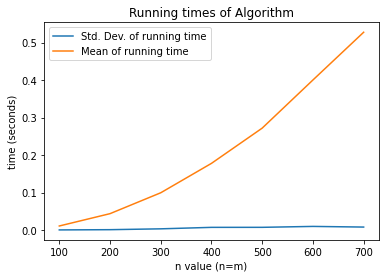

In [328]:
case1timings = []
case2timings = []
case3timings = []
case4timings = []
case5timings = []
case6timings = []
case7timings = []


def timer(sample,arr):
  start_time = time.time_ns() 
  samplerunning = weed_removal_and_path(sample)
  finished_time=time.time_ns()
  total_time = (finished_time-start_time) / (10 ** 9)
  arr.append(total_time)

#generating 5 random matrices of n=m=100:
for x in range(5):
  sample1 = np.random.randint(2, size=(100,100)) #square
  timer(sample1,case1timings)

#generating 5 random matrices of n=m=200:
for x in range(5):
  sample1 = np.random.randint(2,size=(200,200))   #square
  timer(sample1,case2timings)

#generating 5 random matrices of n=m=300:
for x in range(5):
  sample1 = np.random.randint(2,size=(300,300))   #square
  timer(sample1,case3timings)


#generating 5 random matrices of n=m=400:
for x in range(5):
  sample1 = np.random.randint(2, size=(400,400))  #square
  timer(sample1,case4timings)


#generating 5 random matrices of n=m=500:
for x in range(5):
  sample1 = np.random.randint(2,size=(500,500))   #near square
  timer(sample1,case5timings)

#generating 5 random matrices of n=m=600:
for x in range(5):
  sample1 = np.random.randint(2, size=(600,600))  #square
  timer(sample1,case6timings)

#generating 5 random matrices of n=m=700:
for x in range(5):
  sample1 = np.random.randint(2,size=(700,700))   #near square
  timer(sample1,case7timings)

print("n=m=100 ->  Mean: ",mean(case1timings), " Std. Dev.: ", pstdev(case1timings))
print("n=m=200 ->  Mean: ",mean(case2timings), " Std. Dev.: ", pstdev(case2timings))
print("n=m=300 ->  Mean: ",mean(case3timings), " Std. Dev.: ", pstdev(case3timings))
print("n=m=400 ->  Mean: ",mean(case4timings), " Std. Dev.: ", pstdev(case4timings))
print("n=m=500 ->  Mean: ",mean(case5timings), " Std. Dev.: ", pstdev(case5timings))
print("n=m=600 ->  Mean: ",mean(case6timings), " Std. Dev.: ", pstdev(case6timings))
print("n=m=700 ->  Mean: ",mean(case7timings), " Std. Dev.: ", pstdev(case7timings))

meantimes = []
meantimes.append(mean(case1timings))
meantimes.append(mean(case2timings))
meantimes.append(mean(case3timings))
meantimes.append(mean(case4timings))
meantimes.append(mean(case5timings))
meantimes.append(mean(case6timings))
meantimes.append(mean(case7timings))

stdtimes = []
stdtimes.append(pstdev(case1timings))
stdtimes.append(pstdev(case2timings))
stdtimes.append(pstdev(case3timings))
stdtimes.append(pstdev(case4timings))
stdtimes.append(pstdev(case5timings))
stdtimes.append(pstdev(case6timings))
stdtimes.append(pstdev(case7timings))

n = [100,200,300,400,500,600,700]

plt.title("Running times of Algorithm")
plt.plot(n, stdtimes, label = "Std. Dev. of running time")

plt.plot(n, meantimes, label = "Mean of running time")
plt.xlabel("n value (n=m)")
plt.ylabel("time (seconds)")
plt.legend()
plt.show()

Here I will scatter the data and fit a line for the mean values :)

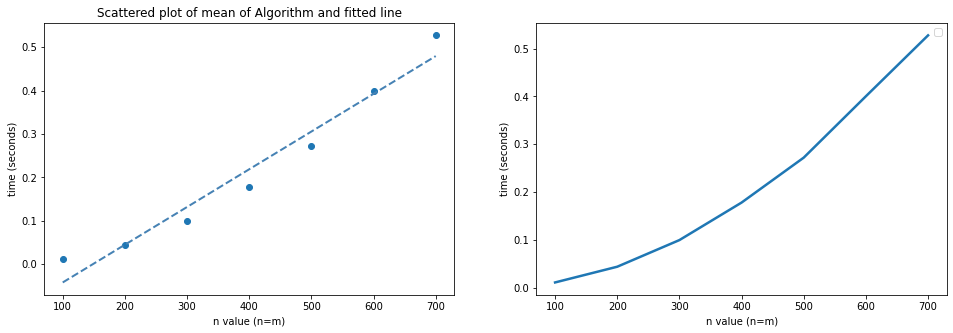

In [329]:
plt.figure(figsize=(25,5))
plt.subplot(132)
plt.title("Scattered plot of mean of Algorithm and fitted line")
plt.scatter(n, meantimes , label = "Mean running time")
plt.xlabel("n value (n=m)")
plt.ylabel("time (seconds)")
x=np.array([100,200,300,400,500,600,700])
y = np.array(meantimes)
a, b = np.polyfit(x, y, 1)
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)
plt.subplot(133)
plt.plot(n,meantimes,linewidth=2.5)
plt.xlabel("n value (n=m)")
plt.ylabel("time (seconds)")

plt.legend()
plt.show()

Using log comparison: 

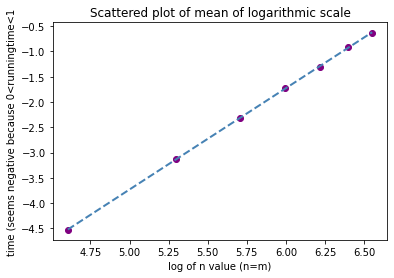

In [330]:
fig = plt.figure()
x=np.array([100,200,300,400,500,600,700])
y = np.array(meantimes)
plt.title("Scattered plot of mean of logarithmic scale")
plt.xlabel("log of n value (n=m)")
plt.ylabel("time (seems negative because 0<runningtime<1")
logx=np.log(x)
logy=np.log(y)

a, b = np.polyfit(logx, logy, 1)
plt.scatter(logx, logy, color='purple')
plt.plot(logx, a*logx+b, color='steelblue', linestyle='--', linewidth=2)



(c) CENTRAL LIMITING THEOREM

(The table wasn't available on sucourse so I calculated only the estimated standard error)


In [331]:
for a in range(len(x)):
  print("For n=m=",x[a], " estimated standard error is :")
  sm = stdtimes[a]/2.153
  print(sm)
  print("----")

For n=m= 100  estimated standard error is :
0.00014332885418179295
----
For n=m= 200  estimated standard error is :
0.0004357151069188708
----
For n=m= 300  estimated standard error is :
0.0014856103294829215
----
For n=m= 400  estimated standard error is :
0.003309853275322042
----
For n=m= 500  estimated standard error is :
0.0033505648175460602
----
For n=m= 600  estimated standard error is :
0.004480517237870345
----
For n=m= 700  estimated standard error is :
0.003672000844467564
----


(C) PERFORMANCE SUIT 2 ( comparison of time/matrix size) :

The matrix dimensions might not be equal. Here, it is similar to Performance suit 1, but the difference is I considered 3 shape/dimension cases for every matrix (very long, near square, wide) since the matrices given might not be always equal. In this case, comparison with size(n*m) is possible but unlike suit 1, it is not possible to compare the running time with only n or m since they may also vary.





Size:10000 ->  Mean:  0.01617144993333333  Std. Dev.:  0.007376186633808831
Size:20000 ->  Mean:  0.04233021866666667  Std. Dev.:  0.028757337441263492
Size:30000 ->  Mean:  0.07961541813333334  Std. Dev.:  0.06415481254188386
Size:40000 ->  Mean:  0.12554114726666668  Std. Dev.:  0.1135835704936948
Size:50000 ->  Mean:  0.18017802373333333  Std. Dev.:  0.18023775470992248
Size:100000 ->  Mean:  0.6226756040666667  Std. Dev.:  0.7287678880102185
Size:150000 ->  Mean:  1.3573394165333332  Std. Dev.:  1.6982612603210354
Size:200000 ->  Mean:  2.5301145548  Std. Dev.:  1.6982612603210354


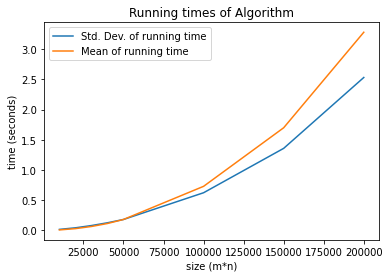

In [332]:
case1timings = []
case2timings = []
case3timings = []
case4timings = []
case5timings = []
case6timings = []
case7timings = []
case8timings = []

def timer(sample,arr):
  start_time = time.time_ns() 
  samplerunning = weed_removal_and_path(sample)
  finished_time=time.time_ns()
  total_time = (finished_time-start_time) / (10 ** 9)
  arr.append(total_time)

#generating 15 random matrices of size 10000 (n*m = 10000):
for x in range(5):
  sample1 = np.random.randint(2, size=(1,10000)) #long
  sample2 = np.random.randint(2, size=(100,100)) #near square
  sample3 = np.random.randint(2,size=(250,40)) #wide
  timer(sample1,case1timings)
  timer(sample2,case1timings)
  timer(sample3,case1timings)

#generating 15 random matrices of size 20000 (n*m = 20000):
for x in range(5):
  sample1 = np.random.randint(2, size=(1,20000))  #long
  sample2 = np.random.randint(2,size=(100,200))   #near square
  sample3 = np.random.randint(2, size=(250,80))  #wide
  timer(sample1,case2timings)
  timer(sample3,case2timings)
  timer(sample2,case2timings)

#generating 15 random matrices of size 30000 (n*m = 30000):
for x in range(5):
  sample1 = np.random.randint(2, size=(1,30000))  #long
  sample2 = np.random.randint(2,size=(150,200))   #near square
  sample3 = np.random.randint(2, size=(300,100))  #wide
  timer(sample1,case3timings)
  timer(sample2,case3timings)
  timer(sample3,case3timings)


#generating 15 random matrices of size 40000 (n*m = 40000):
for x in range(5):
  sample1 = np.random.randint(2, size=(1,40000))  #long
  sample2 = np.random.randint(2,size=(200,200))   #near square
  sample3 = np.random.randint(2, size=(250,160))  #wide
  timer(sample1,case4timings)
  timer(sample2,case4timings)
  timer(sample3,case4timings)


#generating 15 random matrices of size 50000 (n*m = 50000):
for x in range(5):
  sample1 = np.random.randint(2, size=(1,50000))  #long
  sample2 = np.random.randint(2,size=(250,200))   #near square
  sample3 = np.random.randint(2, size=(40,1250))  #wide
  timer(sample1,case5timings)
  timer(sample2,case5timings)
  timer(sample3,case5timings)

#generating 15 random matrices of size 100000 (n*m = 100000):
for x in range(5):
  sample1 = np.random.randint(2, size=(1,100000))  #long
  sample2 = np.random.randint(2,size=(250,400))   #near square
  sample3 = np.random.randint(2, size=(80,1250))  #wide
  timer(sample1,case6timings)
  timer(sample2,case6timings)
  timer(sample3,case6timings)

#generating 15 random matrices of size 150000 (n*m = 150000):
for x in range(5):
  sample1 = np.random.randint(2, size=(1,150000))  #long
  sample2 = np.random.randint(2,size=(300,500))   #near square
  sample3 = np.random.randint(2, size=(150,1000))  #wide
  timer(sample1,case7timings)
  timer(sample2,case7timings)
  timer(sample3,case7timings)

#generating 15 random matrices of size 200000 (n*m = 100000):
for x in range(5):
  sample1 = np.random.randint(2, size=(1,200000))  #long
  sample2 = np.random.randint(2,size=(500,400))   #near square
  sample3 = np.random.randint(2, size=(160,1250))  #wide
  timer(sample1,case8timings)
  timer(sample2,case8timings)
  timer(sample3,case8timings)

print("Size:10000 ->  Mean: ",mean(case1timings), " Std. Dev.: ", pstdev(case1timings))
print("Size:20000 ->  Mean: ",mean(case2timings), " Std. Dev.: ", pstdev(case2timings))
print("Size:30000 ->  Mean: ",mean(case3timings), " Std. Dev.: ", pstdev(case3timings))
print("Size:40000 ->  Mean: ",mean(case4timings), " Std. Dev.: ", pstdev(case4timings))
print("Size:50000 ->  Mean: ",mean(case5timings), " Std. Dev.: ", pstdev(case5timings))
print("Size:100000 ->  Mean: ",mean(case6timings), " Std. Dev.: ", pstdev(case6timings))
print("Size:150000 ->  Mean: ",mean(case7timings), " Std. Dev.: ", pstdev(case7timings))
print("Size:200000 ->  Mean: ",mean(case8timings), " Std. Dev.: ", pstdev(case7timings))

meantimes = []
meantimes.append(mean(case1timings))
meantimes.append(mean(case2timings))
meantimes.append(mean(case3timings))
meantimes.append(mean(case4timings))
meantimes.append(mean(case5timings))
meantimes.append(mean(case6timings))
meantimes.append(mean(case7timings))
meantimes.append(mean(case8timings))

stdtimes = []
stdtimes.append(pstdev(case1timings))
stdtimes.append(pstdev(case2timings))
stdtimes.append(pstdev(case3timings))
stdtimes.append(pstdev(case4timings))
stdtimes.append(pstdev(case5timings))
stdtimes.append(pstdev(case6timings))
stdtimes.append(pstdev(case7timings))
stdtimes.append(pstdev(case8timings))

sizes = [10000,20000,30000,40000,50000,100000,150000,200000]


plt.title("Running times of Algorithm")
plt.plot(sizes, meantimes, label = "Std. Dev. of running time")
plt.plot(sizes, stdtimes, label = "Mean of running time")
plt.xlabel("size (m*n)")
plt.ylabel("time (seconds)")
plt.legend()
plt.show()

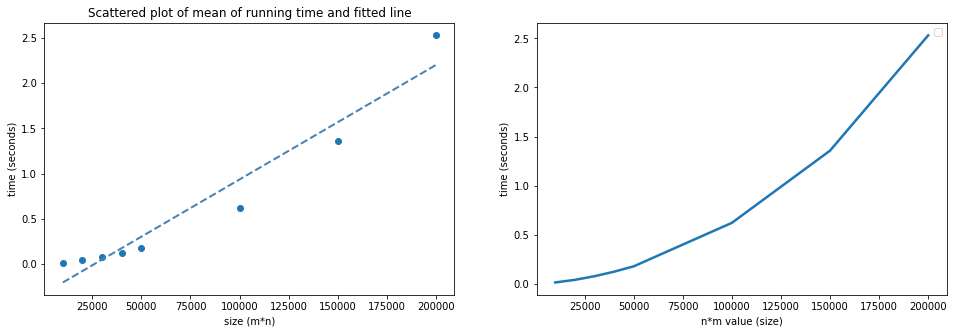

In [333]:
plt.figure(figsize=(25,5))
plt.subplot(132)
plt.title("Scattered plot of mean of running time and fitted line")

plt.xlabel("size (m*n)")
plt.ylabel("time (seconds)")
x=np.array([10000,20000,30000,40000,50000,100000,150000,200000])
plt.scatter(x, meantimes , label = "Mean running time")
y = np.array(meantimes)
a, b = np.polyfit(x, y, 1)
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)
plt.subplot(133)
plt.plot(x,meantimes,linewidth=2.5)
plt.xlabel("n*m value (size)")
plt.ylabel("time (seconds)")

plt.legend()
plt.show()

And in logarithmic scale for y and x axis to see relation in a more linear way:

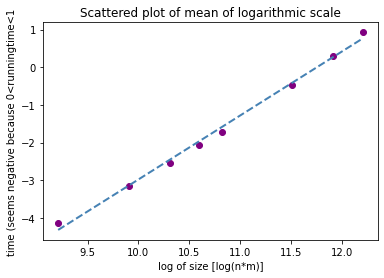

In [334]:
fig = plt.figure()
plt.title("Scattered plot of mean of logarithmic scale")
plt.xlabel("log of size [log(n*m)]")
plt.ylabel("time (seems negative because 0<runningtime<1")
logx=np.log(x)
logy=np.log(y)

a, b = np.polyfit(logx, logy, 1)
plt.scatter(logx, logy, color='purple')
plt.plot(logx, a*logx+b, color='steelblue', linestyle='--', linewidth=2)

(c) CENTRAL LIMITING THEOREM

(The table wasn't available on sucourse so I calculated only the estimated standard error)





In [335]:
for a in range(len(x)):
  print("For n*m=",x[a], " estimated standard error is :")
  sm = stdtimes[a]/3.912
  print(sm)
  print("----")


For n*m= 10000  estimated standard error is :
0.0018855282806259793
----
For n*m= 20000  estimated standard error is :
0.0073510576281348395
----
For n*m= 30000  estimated standard error is :
0.01639949195855927
----
For n*m= 40000  estimated standard error is :
0.029034655034175565
----
For n*m= 50000  estimated standard error is :
0.046073045682495525
----
For n*m= 100000  estimated standard error is :
0.1862903599208125
----
For n*m= 150000  estimated standard error is :
0.4341158640902442
----
For n*m= 200000  estimated standard error is :
0.838151422146439
----


**Final Comments:**
Results of second part are accurate as part 1. As can be observed, my program can deal with unexpected inputs as well as extreme cases that were included in functional testing methods. In the performance evaluation suits part, there is a polynomial growth as observed in part 1 which also support my expectations. With very large input such as 200x200 matrices, the program can cope with because of memoization. If we would have a tried a naive method, the growth would be faster and probably we wouldn't be able to even calculate these instances. I believe that my dynamic programming algorithm has a good performance. Lastly, we can observe that with constant increase of input matrix size/ n, the growth is less significant compared to the constant multiplication of the input matrix / n.